# GCB535: p-values and multiple hypothesis testing

## Instructions

In this *adventure*, you are going to analyze gene expression data from an experiment aimed at finding genes that change abundance in respose to ER stress. Human fibroblast cells were treated with the drug tunicamycin, a drug that inhibits N-linked glycosylation resulting in the accumulation of unfolded proteins in the ER. We already provided the results of an analysis pipeline that used three biological repeats to estimate the fold change and p-value for each gene.

Load the file data.csv and take a look at the first few lines

In [1]:
library(tidyverse)
data = read.csv('data.csv')
head(data)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,log2FoldChange,pvalue,gene_id,symbol
,<dbl>,<dbl>,<chr>,<chr>
1,-0.03177736,0.891781902,ENSG00000000003,TSPAN6
2,0.60112678,0.001575198,ENSG00000000419,DPM1
3,0.41584952,0.082989954,ENSG00000000457,SCYL3
4,-0.07146326,0.724455583,ENSG00000000460,C1orf112
5,-0.85244058,0.000009280,ENSG00000000971,CFH
6,-0.06604221,0.616837754,ENSG00000001036,FUCA2


Let's first sort the table based on p-value and take a look at the most significant genes.

Let's examine the p-value distribution and compare it to a p-value distribution where H_0 always hold. We can easily generate such distribution, here we will do this using t-test comparing two groups which we know where drawn from the same distribution. Take a look at the code below and try to understand it (group effort!). We know that you did not go over for loops yet, but they are quite self explanatory....

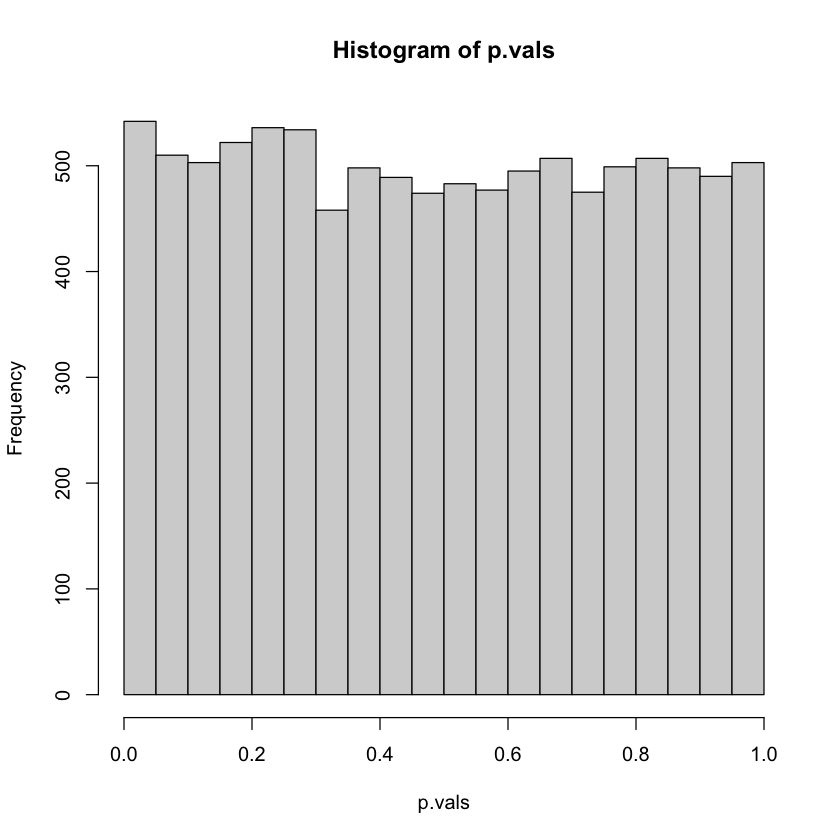

In [2]:
p.vals = vector("numeric", 10000)
for (i in 1:10000) {
  x = rnorm(50, 0, 2)
  y = rnorm(50, 0, 2)
  p.vals[i] = t.test(x,y)$p.value
}
hist(p.vals)


Now plot the p-value distribution of the data provided to you, does it look like there are significant differentially expressed genes?

**Question:** In some cases the p-value distribution can have an opposite skew towards 1, can you guess in what situation this can happen? 

Now we will try to determine which genes are differentially expressed and mark it on a volcano plot (dot plot of the p-value as a function of fold change). First let's do this without any multiple hypothesis correction.

[1] "number of significant genes is 4325"


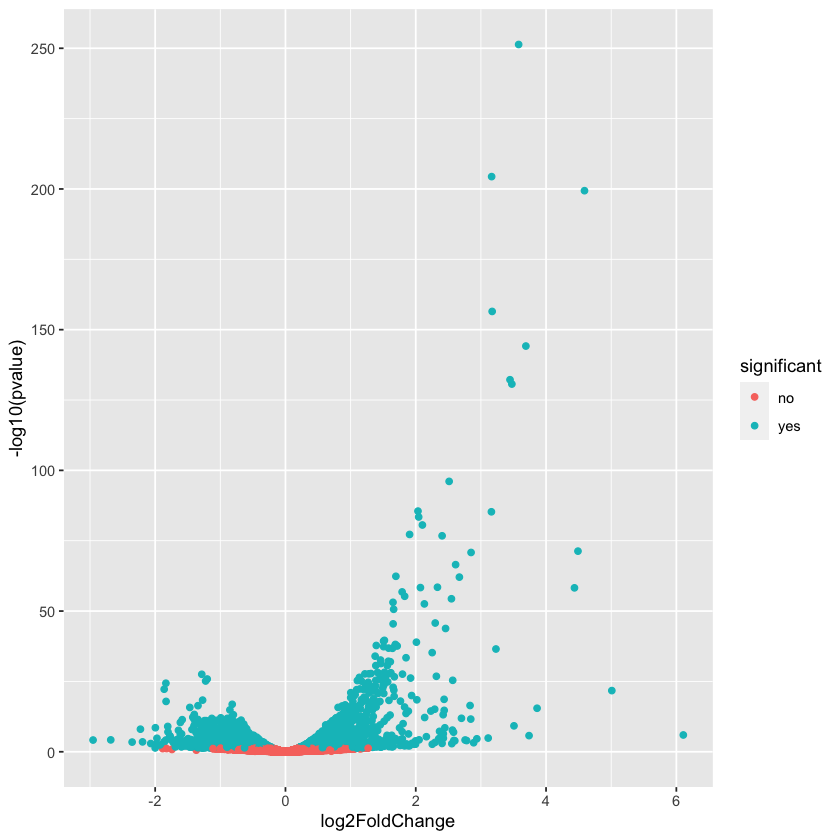

In [3]:
data$significant <- 'no'
data[which(data$pvalue < 0.05),'significant'] <- 'yes'
ggplot(data,aes(x=log2FoldChange,y=-log10(pvalue),col=significant)) + geom_point()
print(paste('number of significant genes is',length(which(data$pvalue < 0.05))))


Repeat the plot above using bonferroni correction and FDR, first calculate adjusted p-values using p.adjust
